In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# pizza 直径
X = np.array([[6], [8], [10], [14], [18]]).reshape(-1, 1)
# 直径对应的价格
y = [7, 9, 13, 17.5, 18]

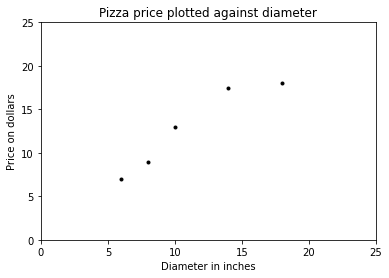

In [3]:
plt.figure()
plt.title("Pizza price plotted against diameter")
plt.xlabel("Diameter in inches")
plt.ylabel("Price on dollars")
plt.plot(X, y, "k.")
plt.axis([0, 25, 0, 25])
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model = LinearRegression()
model.fit(X, y)
test_pizza = np.array([[12]])
predicted_price = model.predict(test_pizza)[0]

In [6]:
print("A 12 'pizza should cost: %.2f'" % predicted_price)

A 12 'pizza should cost: 13.68'


$$
y = \alpha + \beta x
$$

对于所有训练数据而言，如果模型预测响应变量都接近观测值，那么模型就是拟合的，这种衡量模型拟合的方法叫作残差平方和（RSS）代价函数。在形式上，该函数通过对所有训练数据集的残差平方求和来衡量模型的拟合性。
$$
SS_{res} = \sum_{i = 1}^{n} \left( y_i - f(x_i) \right)^2
$$
其中$y_i$是观测值， $f(x_i)$是预测值。

In [7]:
print("Residual sum of squares: %.2f" % np.mean((model.predict(X)) - y))

Residual sum of squares: -0.00


方差用来衡量一组值偏离程度，如果集合中的所有数值都相等，那么这组值的方差为0。方差小意味着这组值都很接近总体均值，而如果集合中包含偏离均值很远的数据则集合会有和很大的方差。
$$
var(x) = \frac{\sum_{i = 1}^{n} (x_i - \overline{x}) ^ 2}{n - 1}
$$

In [8]:
x_bar = X.mean()
print("x_bar", x_bar)

x_bar 11.2


在计算样本方差的时候将样本的数量减去1，称为贝塞尔校正，它纠正了对样本中总体方差估计的偏差。


In [9]:
variance = ((X - x_bar) ** 2).sum() / (X.shape[0] - 1)
print("variance", variance)
print("variance", np.var(X, ddof=1))

variance 23.2
variance 23.2


协方差用来衡量两个变量如何一同变化。如果变量一起增加，它们协方差为正。如果一个变量增加时另一个变量减少，它们的协方差为负。如果两个变量之间没有线性关系，它们的协方差为0，它们是线性无关的但不一定是相对独立的。

$$
cov(x, y) = \frac{\sum_{i - 1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{n - 1}
$$

In [10]:
y = np.array(y)
y_bra = y.mean()
print(y)
print(y_bra)

[ 7.   9.  13.  17.5 18. ]
12.9


In [11]:
covariance = np.multiply((X - x_bar).transpose(), y - y_bra).sum() / (X.shape[0] - 1)
print(covariance)
print(np.cov(X.transpose(), y)[0][1])

22.65
22.650000000000002


$$
\beta = \frac{cov(x, y)}{var(x)}
$$
$$
\alpha = \overline{y} - \beta \overline{x}
$$

$R^2$，**决定系数**，用来衡量数据和回归线的贴近程度

In [12]:
beta = covariance / variance
alpha = y_bra - beta * x_bar

print("beta", beta)
print("alpha", alpha)

beta 0.9762931034482758
alpha 1.9655172413793114


In [13]:
 
xx = np.linspace(0, 25, 100)
yy = alpha + beta * xx

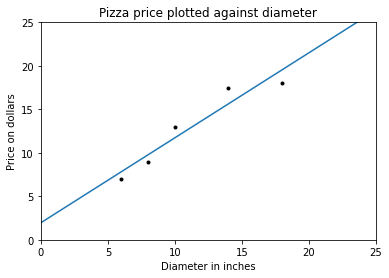

In [14]:
plt.figure()
plt.title("Pizza price plotted against diameter")
plt.xlabel("Diameter in inches")
plt.ylabel("Price on dollars")
plt.plot(X, y, "k.")
plt.plot(xx, yy)
plt.axis([0, 25, 0, 25])
plt.show()